In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dia = pd.read_csv(r'C:\Users\Anas Ben Talouba\Downloads\diabetes.csv')

In [3]:
print("Taille de données :", dia.shape)
print(dia.info())
print(dia.describe())

Taille de données : (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.

In [4]:
print("Valeurs manquantes :", dia.isnull().sum().sum())
print("Doublons :", dia.duplicated().sum())

Valeurs manquantes : 0
Doublons : 0


In [52]:
plt.style.use('seaborn-v0_8-poster')

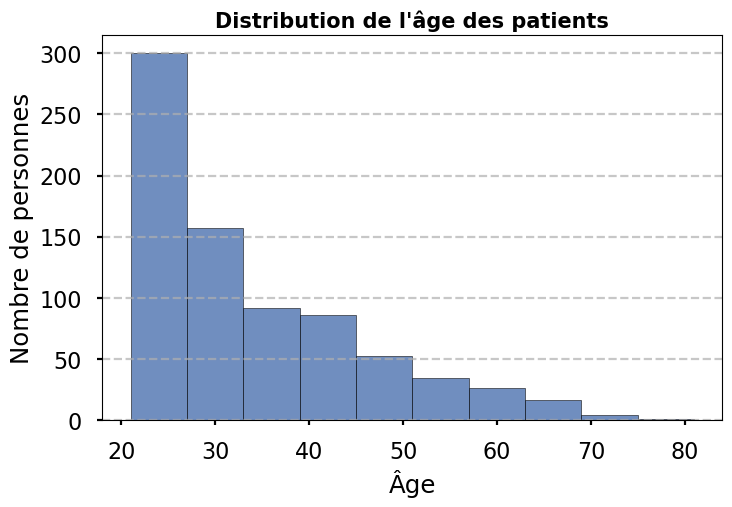

In [53]:
plt.figure(figsize=(8, 5))
plt.hist(dia['Age'], bins=10, color='#4C72B0', edgecolor='black', alpha=0.8)
plt.title("Distribution de l'âge des patients", fontsize=15, fontweight='bold')
plt.xlabel("Âge")
plt.ylabel("Nombre de personnes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

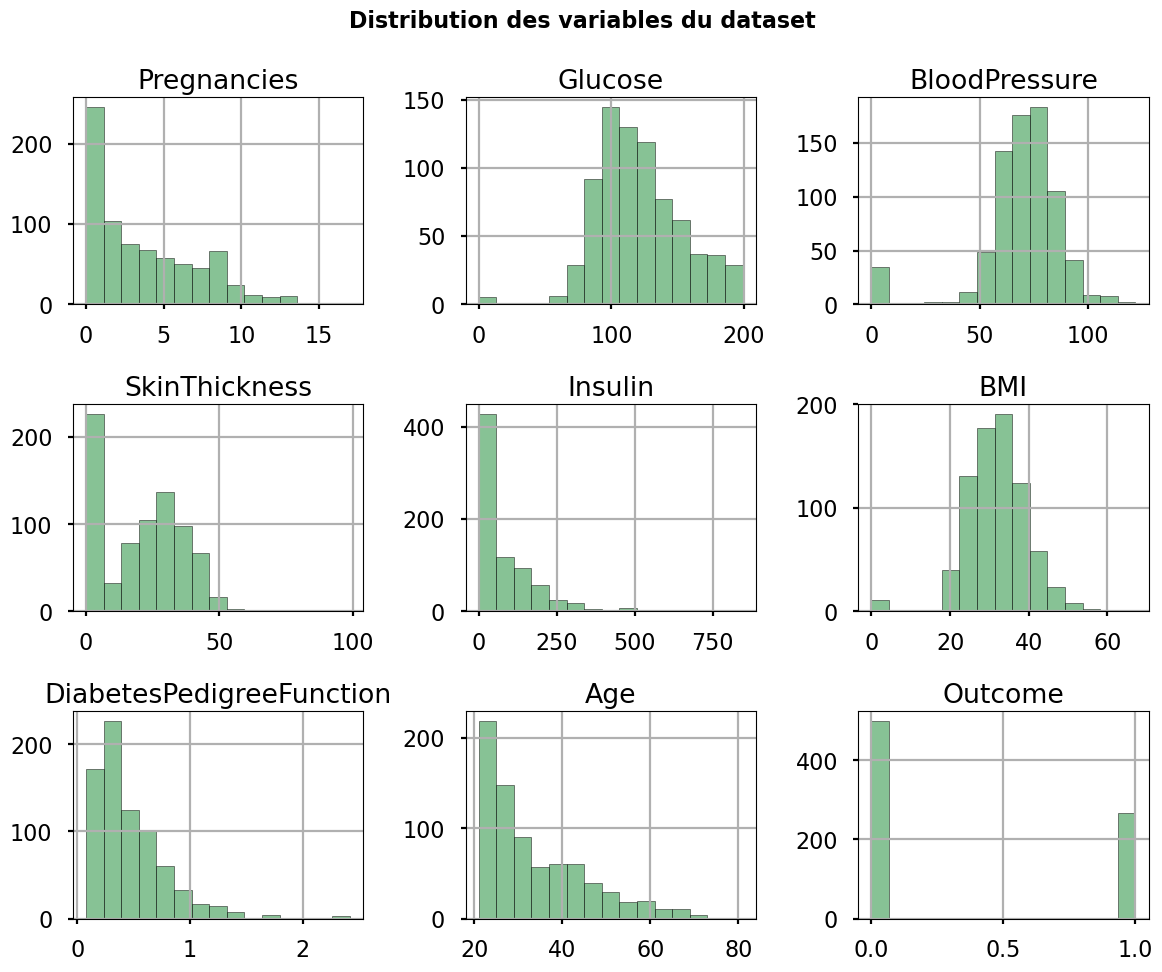

In [54]:
dia.hist(figsize=(12, 10), bins=15, color='#55A868', edgecolor='black', alpha=0.7)
plt.suptitle("Distribution des variables du dataset", fontsize=16, fontweight='bold')
plt.tight_layout(pad=2)
plt.show()


Text(0, 0.5, 'Nombre de personnes')

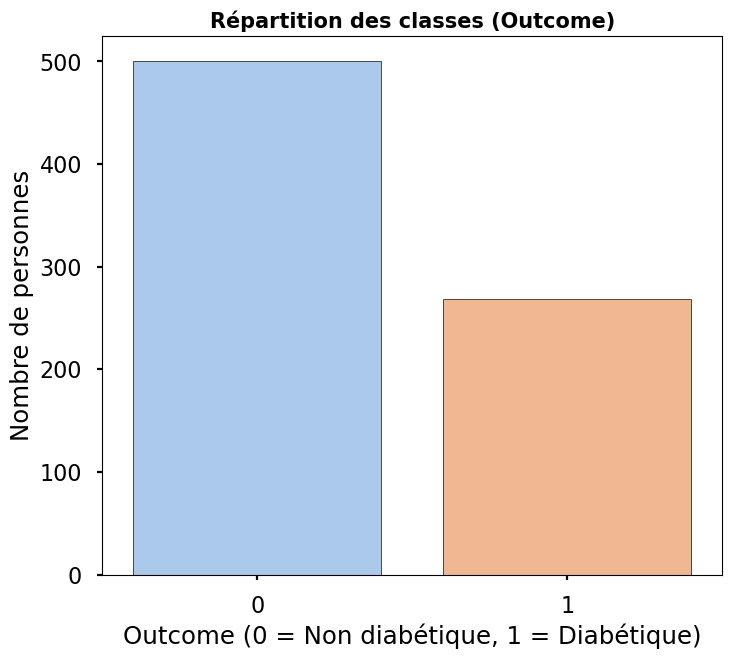

In [58]:
plt.figure(figsize=(8, 7))
ax = sb.countplot(x='Outcome', data=dia, palette='pastel', edgecolor='black')
plt.title("Répartition des classes (Outcome)", fontsize=15, fontweight='bold')
plt.xlabel("Outcome (0 = Non diabétique, 1 = Diabétique)")
plt.ylabel("Nombre de personnes")

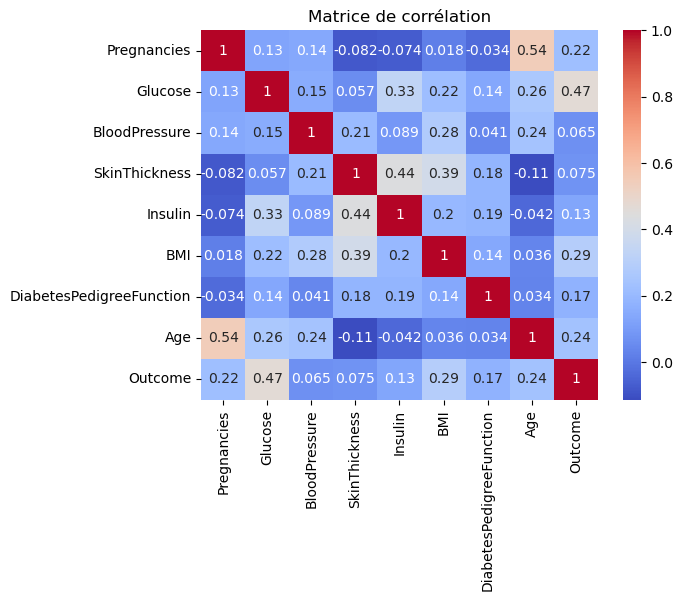

In [10]:
sb.heatmap(dia.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

In [11]:
X = dia.drop(columns=['Outcome'])
y = dia['Outcome']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
EnI = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x_train_transf = EnI.fit_transform(x_train)
x_test_transf = EnI.transform(x_test)

In [15]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_rescaled = scaler.fit_transform(x_train_transf)
x_test_rescaled = scaler.transform(x_test_transf)

In [22]:
EnT = LabelEncoder()
y_train_enc = EnT.fit_transform(y_train)
y_test_enc = EnT.transform(y_test)

In [23]:
results = {}

In [24]:
ANN = MLPClassifier(solver='adam', hidden_layer_sizes=(24,), random_state=1, max_iter=1000)
ANN.fit(x_train_rescaled, y_train_enc)
pred_test = ANN.predict(x_test_rescaled)
pred_train = ANN.predict(x_train_rescaled)
results['ANN_adam'] = {
    'train_acc': accuracy_score(y_train_enc, pred_train),
    'test_acc': accuracy_score(y_test_enc, pred_test),
    'train_f1': f1_score(y_train_enc, pred_train),
    'test_f1': f1_score(y_test_enc, pred_test)
}

In [35]:
ANN = MLPClassifier(solver='sgd', hidden_layer_sizes=(24,), random_state=1, max_iter=1000)
ANN.fit(x_train_rescaled, y_train_enc)
pred_test = ANN.predict(x_test_rescaled)
pred_train = ANN.predict(x_train_rescaled)
results['ANN_sgd'] = {
    'train_acc': accuracy_score(y_train_enc, pred_train),
    'test_acc': accuracy_score(y_test_enc, pred_test),
    'train_f1': f1_score(y_train_enc, pred_train),
    'test_f1': f1_score(y_test_enc, pred_test)
}

In [25]:
ANN2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(24,), random_state=1, max_iter=1000)
ANN2.fit(x_train_rescaled, y_train_enc)
pred_test = ANN2.predict(x_test_rescaled)
pred_train = ANN2.predict(x_train_rescaled)
results['ANN_lbfgs'] = {
    'train_acc': accuracy_score(y_train_enc, pred_train),
    'test_acc': accuracy_score(y_test_enc, pred_test),
    'train_f1': f1_score(y_train_enc, pred_train),
    'test_f1': f1_score(y_test_enc, pred_test)
}

C:\Users\Anas Ben Talouba\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
SVM = NuSVC(kernel='sigmoid')
SVM.fit(x_train_rescaled, y_train_enc)
prdsvm = SVM.predict(x_test_rescaled)
prdsvm1 = SVM.predict(x_train_rescaled)
results['SVM_sigmoid'] = {
    'train_acc': accuracy_score(y_train_enc, prdsvm1),
    'test_acc': accuracy_score(y_test_enc, prdsvm),
    'train_f1': f1_score(y_train_enc, prdsvm1),
    'test_f1': f1_score(y_test_enc, prdsvm)
}

In [40]:
SVM = NuSVC(kernel='linear', gamma='scale')
SVM.fit(x_train_rescaled, y_train_enc)
prdsvm = SVM.predict(x_test_rescaled)
prdsvm1 = SVM.predict(x_train_rescaled)
results['SVM_linear'] = {
    'train_acc': accuracy_score(y_train_enc, prdsvm1),
    'test_acc': accuracy_score(y_test_enc, prdsvm),
    'train_f1': f1_score(y_train_enc, prdsvm1),
    'test_f1': f1_score(y_test_enc, prdsvm)
}

In [41]:
SVM = NuSVC(kernel='poly', degree=3, gamma='scale')
SVM.fit(x_train_rescaled, y_train_enc)
prdsvm = SVM.predict(x_test_rescaled)
prdsvm1 = SVM.predict(x_train_rescaled)
results['SVM_poly'] = {
    'train_acc': accuracy_score(y_train_enc, prdsvm1),
    'test_acc': accuracy_score(y_test_enc, prdsvm),
    'train_f1': f1_score(y_train_enc, prdsvm1),
    'test_f1': f1_score(y_test_enc, prdsvm)
}

In [39]:
SVM = NuSVC(kernel='rbf', gamma='scale')
SVM.fit(x_train_rescaled, y_train_enc)
prdsvm = SVM.predict(x_test_rescaled)
prdsvm1 = SVM.predict(x_train_rescaled)
results['SVM_rbf'] = {
    'train_acc': accuracy_score(y_train_enc, prdsvm1),
    'test_acc': accuracy_score(y_test_enc, prdsvm),
    'train_f1': f1_score(y_train_enc, prdsvm1),
    'test_f1': f1_score(y_test_enc, prdsvm)
}

In [42]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)
rfc.fit(x_train, y_train)
pred_test = rfc.predict(x_test)
pred_train = rfc.predict(x_train)
results['RandomForest'] = {
    'train_acc': accuracy_score(y_train, pred_train),
    'test_acc': accuracy_score(y_test, pred_test),
    'train_f1': f1_score(y_train, pred_train),
    'test_f1': f1_score(y_test, pred_test)
}

In [43]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
clf.fit(x_train, y_train)
pred_test = clf.predict(x_test)
pred_train = clf.predict(x_train)
results['DecisionTree'] = {
    'train_acc': accuracy_score(y_train, pred_train),
    'test_acc': accuracy_score(y_test, pred_test),
    'train_f1': f1_score(y_train, pred_train),
    'test_f1': f1_score(y_test, pred_test)
}


In [44]:
GNB = GaussianNB(var_smoothing=1e-9)
GNB.fit(x_train, y_train)
pred_test = GNB.predict(x_test)
pred_train = GNB.predict(x_train)
results['NaiveBayes'] = {
    'train_acc': accuracy_score(y_train, pred_train),
    'test_acc': accuracy_score(y_test, pred_test),
    'train_f1': f1_score(y_train, pred_train),
    'test_f1': f1_score(y_test, pred_test)
}

In [50]:
from sklearn import metrics

Ks = 40
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

best_k = mean_acc.argmax() + 1
print(f"The best K value is {best_k} with accuracy {mean_acc.max():.3f}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
pred_test = knn.predict(x_test)
pred_train = knn.predict(x_train)
results[f'KNN_k={best_k}'] = {
    'train_acc': accuracy_score(y_train, pred_train),
    'test_acc': accuracy_score(y_test, pred_test),
    'train_f1': f1_score(y_train, pred_train),
    'test_f1': f1_score(y_test, pred_test)
}

The best K value is 19 with accuracy 0.799


In [46]:
df_results = pd.DataFrame(results).T
df_results = df_results.sort_values(by='test_acc', ascending=False)

In [47]:
print("\n===== COMPARAISON DES MODÈLES =====")
print(df_results)


===== COMPARAISON DES MODÈLES =====
              train_acc  test_acc  train_f1   test_f1
RandomForest   0.993485  0.805195  0.990868  0.659091
KNN_k=19       0.762215  0.798701  0.623711  0.626506
NaiveBayes     0.757329  0.792208  0.646081  0.644444
ANN_sgd        0.758958  0.792208  0.624365  0.555556
ANN_adam       0.763844  0.785714  0.648910  0.560000
KNN            0.785016  0.753247  0.673267  0.604167
SVM_linear     0.745928  0.753247  0.632075  0.512821
SVM_rbf        0.824104  0.733766  0.723077  0.369231
SVM_poly       0.817590  0.727273  0.726829  0.416667
DecisionTree   0.952769  0.701299  0.930456  0.520833
ANN_lbfgs      0.990228  0.694805  0.986364  0.433735
SVM            0.701954  0.642857  0.524675  0.303797


In [48]:
best_model = df_results['test_acc'].idxmax()
print(f"\n🏆 Le meilleur modèle est : {best_model} avec une précision de {df_results.loc[best_model, 'test_acc']:.3f}")


🏆 Le meilleur modèle est : RandomForest avec une précision de 0.805


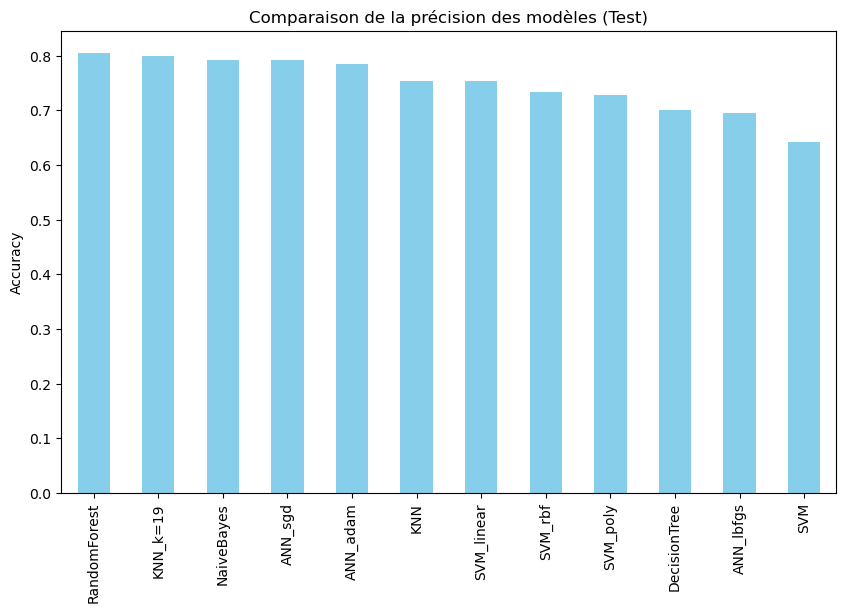

In [49]:
plt.figure(figsize=(10,6))
df_results['test_acc'].plot(kind='bar', color='skyblue')
plt.title("Comparaison de la précision des modèles (Test)")
plt.ylabel("Accuracy")
plt.show()